<a href="https://colab.research.google.com/github/Athukorale/MachineLearning/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score



In [6]:
df = pd.read_csv('Adult data.csv')

In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num',
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country',
       'Income'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  Native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
df.replace({'?': np.nan, ' ?': np.nan, '? ': np.nan, ' ? ': np.nan}, inplace=True)

# Find rows with missing values
MissingValues= df[df.isnull().any(axis=1)]

# Display the rows with missing values
print("Rows with missing values:")
print(MissingValues)


Rows with missing values:
       Age Workclass  Fnlwgt      Education  Education-num  \
14      40   Private  121772      Assoc-voc             11   
27      54       NaN  180211   Some-college             10   
38      31   Private   84154   Some-college             10   
51      18   Private  226956        HS-grad              9   
61      32       NaN  293936        7th-8th              4   
...    ...       ...     ...            ...            ...   
32530   35       NaN  320084      Bachelors             13   
32531   30       NaN   33811      Bachelors             13   
32539   71       NaN  287372      Doctorate             16   
32541   41       NaN  202822        HS-grad              9   
32542   72       NaN  129912        HS-grad              9   

               Marital-status      Occupation    Relationship  \
14         Married-civ-spouse    Craft-repair         Husband   
27         Married-civ-spouse             NaN         Husband   
38         Married-civ-spouse     

In [ ]:
# Count the number of NaN values in each column
NanColumns = df.isnull().sum()

# Display the count of NaN values in each column
print("Number of NaN values in each column:")
print(NanColumns)


Number of NaN values in each column:
Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     583
Income               0
dtype: int64


In [ ]:
# Identify and remove duplicate rows
df_no_duplicates = df.drop_duplicates()

# Display the DataFrame after removing duplicates
print("DataFrame without duplicates:")
print(df_no_duplicates)


DataFrame without duplicates:
       Age          Workclass  Fnlwgt    Education  Education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            Marital-status          Occupation    Relationship    Race  \
0            Never-married        Adm-clerical   Not-in-family   Wh

In [ ]:
# Display the shape of the DataFrame before removing duplicates
print("Shape before removing duplicates:", df.shape)

# Remove duplicates from the original DataFrame
df.drop_duplicates(inplace=True)

# Display the shape of the DataFrame after removing duplicates
print("Shape after removing duplicates:", df.shape)


Shape before removing duplicates: (32561, 15)
Shape after removing duplicates: (32537, 15)


In [ ]:
#replacing NaN values with the mode of respective columns
for column in df.columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)


print("DataFrame after replacing NaN with mode:")
print(df)


DataFrame after replacing NaN with mode:
       Age          Workclass  Fnlwgt    Education  Education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            Marital-status          Occupation    Relationship    Race  \
0            Never-married        Adm-clerical   Not-in-

In [9]:
#Encode categorical variables by replacing the categorical values with numerical labels
new_label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    new_label_encoders[column] = LabelEncoder()
    df[column] = new_label_encoders[column].fit_transform(df[column])

In [23]:
X = df.drop('Income', axis=1)
y= df['Income']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [38]:
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter grid to search
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [10,20,30],
    'min_samples_leaf': [20,25,30]
}

# Grid search with cross-validation on the training data
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters from the grid search
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Train the final Random Forest model with the best hyperparameters
final_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
final_rf_classifier.fit(X_train, y_train)

# Predict classes on the testing dataset
y_pred_rf = final_rf_classifier.predict(X_test)

# Evaluate the final Random Forest model on the testing dataset
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest on Testing Data:")
print(report_rf)

Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 300}
Classification Report for Random Forest on Testing Data:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4942
           1       0.79      0.59      0.67      1571

    accuracy                           0.86      6513
   macro avg       0.83      0.77      0.79      6513
weighted avg       0.86      0.86      0.85      6513



In [40]:
# Calculate and print testing accuracy for Random Forest with four decimal places
accuracy_test_rf = accuracy_score(y_test, y_pred_rf)
print("Testing Accuracy (Random Forest): {:.4f}".format(accuracy_test_rf))

Testing Accuracy (Random Forest): 0.8621


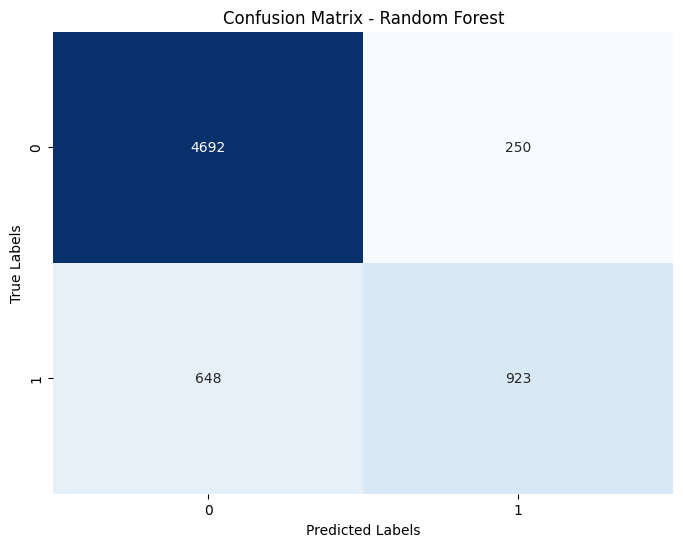

In [41]:
# Print the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [42]:
# Calculate and print testing accuracy with four decimal places
accuracy_test = accuracy_score(y_test, y_pred_rf)
print("Testing Accuracy: {:.4f}".format(accuracy_test))

# Calculate and print training accuracy with four decimal places
y_pred_train_rf = final_rf_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train_rf)
print("Training Accuracy: {:.4f}".format(accuracy_train))

Testing Accuracy: 0.8621
Training Accuracy: 0.8682


In [43]:
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the Gaussian Naive Bayes model
nb_classifier.fit(X_train, y_train)

# Predict classes on the testing dataset
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the Gaussian Naive Bayes model on the testing dataset
report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report for Gaussian Naive Bayes on Testing Data:")
print(report_nb)


Classification Report for Gaussian Naive Bayes on Testing Data:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4942
           1       0.67      0.32      0.44      1571

    accuracy                           0.80      6513
   macro avg       0.74      0.64      0.66      6513
weighted avg       0.78      0.80      0.77      6513



In [44]:
accuracy_test_nb = accuracy_score(y_test, y_pred_nb)
print("Testing Accuracy (Naive Bayes): {:.4f}".format(accuracy_test_nb))


Testing Accuracy (Naive Bayes): 0.7990


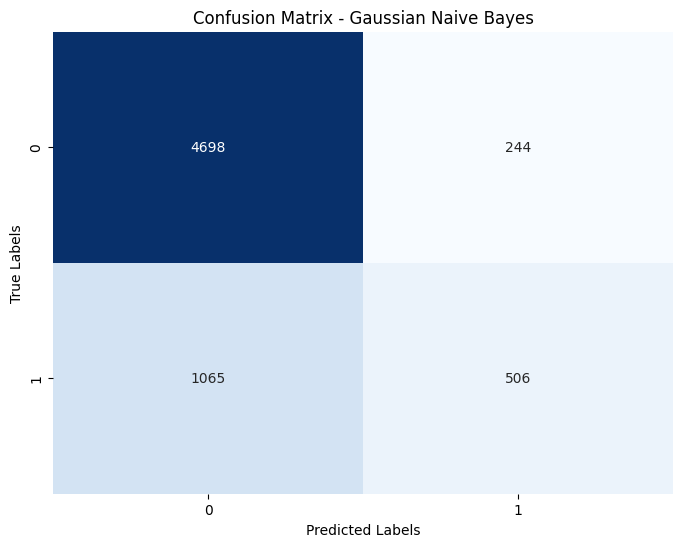

In [45]:
# Print the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()

In [46]:
# Calculate and print testing accuracy with four decimal places
accuracy_test_nb = accuracy_score(y_test, y_pred_nb)
print("Testing Accuracy: {:.4f}".format(accuracy_test_nb))

# Calculate and print training accuracy with four decimal places
y_pred_train_nb = nb_classifier.predict(X_train)
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
print("Training Accuracy: {:.4f}".format(accuracy_train_nb))

Testing Accuracy: 0.7990
Training Accuracy: 0.7946


In [47]:
# Compare the models using accuracy
print("\nModel Comparison:")
print("Testing Accuracy (Random Forest): {:.4f}".format(accuracy_test_rf))
print("Testing Accuracy (Naive Bayes): {:.4f}".format(accuracy_test_nb))


Model Comparison:
Testing Accuracy (Random Forest): 0.8621
Testing Accuracy (Naive Bayes): 0.7990
